In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
data=pd.read_csv('C:/Users/User/Downloads/insurance.csv')
data
d=pd.get_dummies(data)
features=d.drop('charges',axis=1)
f_considered=d[['smoker_yes','age','bmi','children']]

In [142]:
d.info()
d.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
age                 1338 non-null int64
bmi                 1338 non-null float64
children            1338 non-null int64
charges             1338 non-null float64
sex_female          1338 non-null uint8
sex_male            1338 non-null uint8
smoker_no           1338 non-null uint8
smoker_yes          1338 non-null uint8
region_northeast    1338 non-null uint8
region_northwest    1338 non-null uint8
region_southeast    1338 non-null uint8
region_southwest    1338 non-null uint8
dtypes: float64(2), int64(2), uint8(8)
memory usage: 52.3 KB


,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.494768,0.505232,0.795217,0.204783,0.242152,0.242900,0.272048,0.242900
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.500160,0.403694,0.403694,0.428546,0.428995,0.445181,0.428995
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


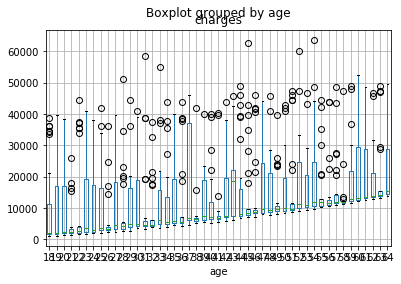

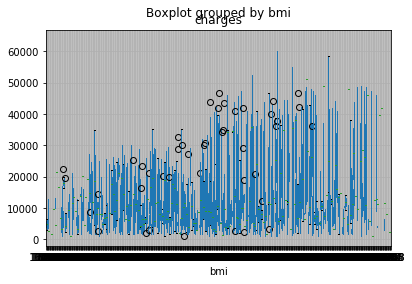

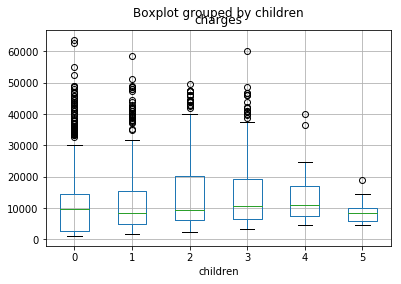

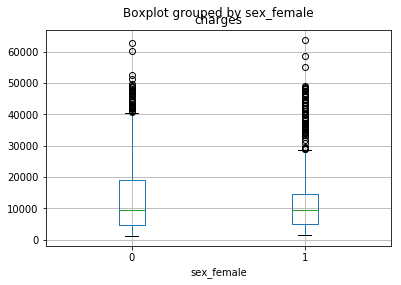

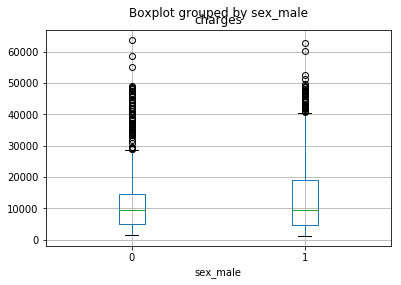

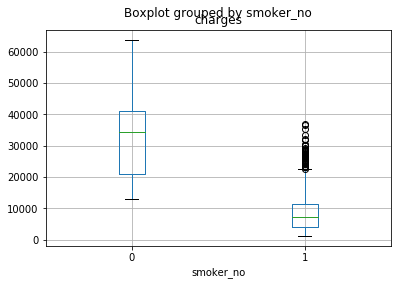

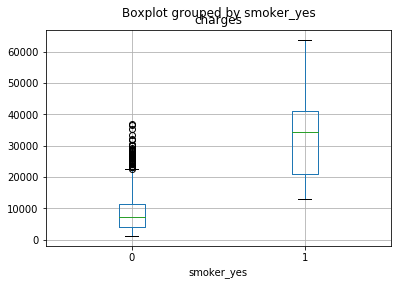

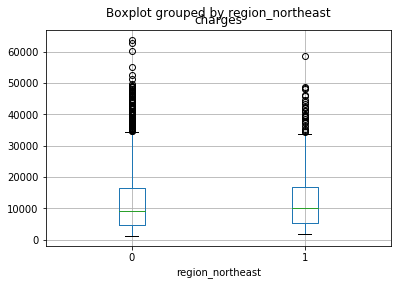

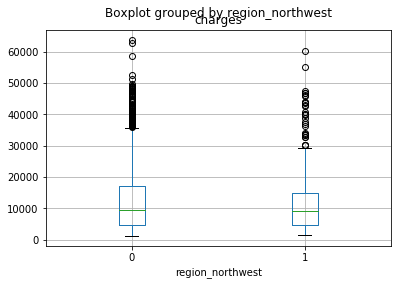

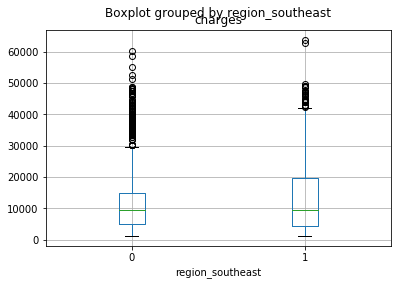

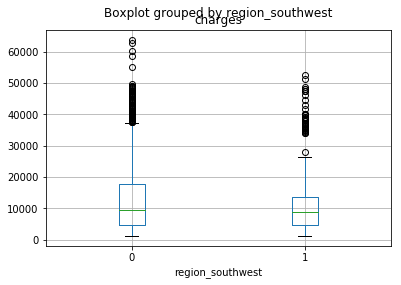

In [127]:
for x in features:
    d.boxplot(column='charges',by=x)

In [143]:
from sklearn.cross_validation import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split(f_considered, d['charges'], test_size =0.2,random_state = 4) 
   
print("xtrain shape : ", xtrain.shape) 
print("xtest shape  : ", xtest.shape) 
print("ytrain shape : ", ytrain.shape) 
print("ytest shape  : ", ytest.shape) 

xtrain shape :  (1070, 4)
xtest shape  :  (268, 4)
ytrain shape :  (1070,)
ytest shape  :  (268,)


In [144]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
regressor.fit(xtrain, ytrain) 
   


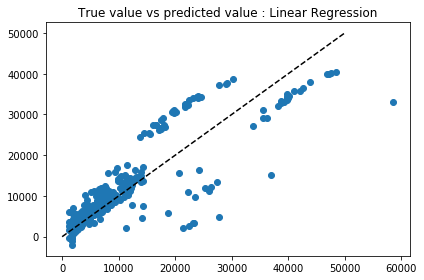

In [151]:
# predicting the test set results 
y_pred = regressor.predict(xtest) 
y_expected=ytest
plt.scatter(ytest, y_pred)
plt.plot([0, 50000], [0, 50000], '--k')
plt.axis('tight')
plt.title("True value vs predicted value : Linear Regression") 
plt.tight_layout()

In [152]:
from sklearn.metrics import mean_squared_error 
mse = mean_squared_error(ytest, y_pred) 
print("Mean Square Error : ", mse) 

Mean Square Error :  38568603.2808


from sklearn.ensemble import GradientBoostingRegressor

clf = GradientBoostingRegressor()
clf.fit(xtrain, ytrain)

predicted = clf.predict(xtest)
expected = ytest

plt.figure(figsize=(4, 3))
plt.scatter(expected, predicted)
plt.plot([0, 50000], [0, 50000], '--k')
plt.axis('tight')
plt.title("True value vs predicted value : Linear Regression") 
plt.tight_layout()

In [148]:
print("RMS: %r " % np.sqrt(np.mean((predicted - expected) ** 2)))

RMS: 4623.5995482096796 


In [153]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score
# Calculate the performance of this model
score = performance_metric(predicted,expected)
print ("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.812.
